## Алгоритмы обработки изображений

### Операция свертки 
Свертка - это алгоритм очень широкого применения, который можно использовать как для предварительной обработки изображения, так и для распознавания и идентификации объектов. Пусть изображение задается двумерной матрицей яркостей $F'$, а импульсная характеристика матрицей $H$. Математически свертку матрицы $F$ с ядром $H$ можно определить следующей формулой: 
$$ 
r(i,j)=\sum_{m=-\frac{M_2-1}{2}}^\frac{M_2-1}{2} \sum_{n=-\frac{N_2-1}{2}}^\frac{N_2-1}{2} f(i+m, j+n)h(m,n),
$$
где  $M_2\times N_2$ - размер матрицы ядра свертки. Размер матрицы $F$ равен $(M_1+M_2-1)x(N_1+N_2-1)$, где $M_1\times N_1$ - размер исходной матрицы $F'$. Матрица $F$ получается из исходной путем добавления элементов на краях матрицы по некоторому правилу с тем, чтобы привести ее к необходимому размеру. Обычно исходная матрица на краях дополняется нулями на половину ширины матрицы $H$ влево и вправо и соответственно на половину высоты вверх и настолько же вниз. Тогда размер полученной матрицы $R$ будет таким же, как и у матрицы $F'$.
Свертку можно вычислять непосредственно "пробеганием" одной матрицы по другой, как уже было показано выше. На рис. 1 показана схема вычисления свертки (размер матрицы маски взят равным $3\times 3)$. Оператор свертки можно рассматривать как матрицу коэффициентов (масок), которые поэлементно умножаются с выделенным фрагментом изображения с последующим суммированием для получения нового значения элемента отфильтрованного изображения. Эта матрица может быть произвольного размера, необязательно квадратная.


<img src="./files1/image11.png">
Рис. 1. Реализация операции свертки

## Задание
### Реализовать алгоритм, выполняющий операцию свертки исходного изображения с матрицей-маской
Размер и вид матрицы-маски задаются пользователем.
Используйте следующие матрицы маски для реализации различных алгоритмов обработки изображений:


* для сглаживания и подавления шумов в изображении используют  матрицу-маску размером 3х3 следующего вида:
$$
\frac{1}{9}\begin{bmatrix}
    1  & 1 & 1 \\
    1  & 1 & 1 \\
    1  & 1 & 1
\end{bmatrix}
$$

* для подчеркивания контуров используются матрицы-маски следующего вида:
$$
\frac{1}{9}\begin{bmatrix}
    -1 & -1 & -1 \\
    -1 &  17 & -1 \\
    -1 & -1 & -1
\end{bmatrix}
$$

$$
\begin{bmatrix}
    0 & -1 & 0 \\
    -1 &  5 & -1 \\
    0 & -1 & 0
\end{bmatrix}
$$

* для выделения контуров используются маска следующего вида:
$$
\begin{bmatrix}
    -1 & -1 & -1 \\
    -1 &  8 & -1 \\
    -1 & -1 & -1
\end{bmatrix}
$$

 $$
\begin{bmatrix}
     0 & -1 &  0 \\
    -1 &  4 & -1 \\
     0 & -1 &  0
\end{bmatrix}
$$

## **Пример**

In [22]:
import numpy as np
kernel_blur = np.array([[1.,1.,1.],
                        [1.,1.,1.],
                        [1.,1.,1.]])/9.

kernel_sharpen1  = np.array([[-1.,-1.,-1.],
                                [-1.,17.,-1.],
                                [-1.,-1.,-1.]])/9.

kernel_sharpen2 = np.array([[0.,-1.,0.],
                            [-1.,5.,-1.],
                            [0.,-1.,0.]])



kernel_edge_detect1 = np.array([[-1.,-1.,-1.],
                           [-1.,8.,-1.],
                           [-1.,-1.,-1.]])

kernel_edge_detect2 = np.array([[0.,-1.,0.],
                            [-1.,4.,-1.],
                            [0.,-1.,0.]])

#### *Исходное изображение:*

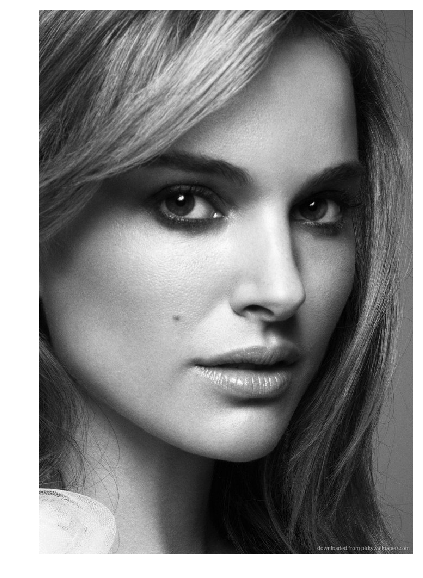

In [23]:
import matplotlib.image as imr
im = imr.imread('files1/test_image.jpg')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
plt.rc('axes',facecolor=(1,1,1,0),edgecolor=(1,1,1,0));
plt.rc(('xtick','ytick'),color=(1,1,1,0));
plt.rcParams["image.cmap"] = "gray"
plt.imshow(im)
plt.show()

#### *Cглаживания и подавления шумов в изображении*

In [24]:
def proc(image, kernel,const=0):
    kernel_sum = kernel.sum()
    image = image/255.
    const = const/255.
    # получение размеров изображения и ядра для итерации по пикселам и весам
    i_height, i_width = image.shape[0], image.shape[1]
    k_width, k_height = kernel.shape[0], kernel.shape[1]

    # создание пустого изображения
    filtered = np.zeros_like(image)

    # Итерация по каждому (x, y) пикселу в изображении ...
    for y in range(i_height):
        for x in range(i_width):
            weighted_pixel_sum = 0

            # Итерация по каждому весу (kx, ky) в ядре, определенному выше ...
            # 'Центральный' вес в ядре итерпретируется как имеющий координаты (0, 0);
            # тогда координаты остальных весов в ядре будут такими:
            #
            #  [ (-1,-1),  (0,-1),  (1,-1)
            #    (-1, 0),  (0, 0),  (1, 0)
            #    (-1, 1),  (0, 1),  (1, 1) ]
            #
            # Таким образом, пиксель изображения с координатами[y,x] будет умножен на вес ядра[0,0]; анналогично,
            # пиксель[y-1,x] будет умножен на вес ядра[-1,0] и.т.д.
            # Значение отфильтрованного писеля это сумма этих произведений. Итак
            #
            #   weighted_pixel_sum = image[y-1,x-1] * kernel[-1,-1] +
            #                        image[y-1,x  ] * kernel[-1, 0] +
            #                        image[y-1,x+1] * kernel[-1, 1] +
            #                        image[y,  x-1] * kernel[ 0, 1] +
            #                        image[y,  x  ] * kernel[ 0, 0] +
            #                        etc.

            for ky in range(-k_height // 2+1, k_height // 2+1):
                for kx in range(-k_width // 2+1, k_width // 2+1):
                    pixel = 0
                    pixel_y = y - ky
                    pixel_x = x - kx

                    # проверка: если пиксель выходит за край изображения, то он равен нулю,
                    # а иначе он берется из изображения.
                    if (pixel_y >= 0) and (pixel_y < i_height) and (pixel_x >= 0) and (pixel_x < i_width):
                        pixel = image[pixel_y,pixel_x]

                    # текущая позия в ядре
                    pos = (ky + k_height // 2, kx + k_width // 2)
                    #import pdb; pdb.set_trace()
                    # получение веса ядра в текущей позиции
                    weight = kernel[pos[1], pos[0]]

                    weighted_pixel_sum += pixel * weight
            weighted_pixel_sum+=const

            # наконец, пиксель с позицией (x,y) это сумма взвешенных соседних пикселей
            if weighted_pixel_sum > 1.:
                weighted_pixel_sum=1.
            elif weighted_pixel_sum < 0.:
                weighted_pixel_sum=0.
            #нормализация   
            filtered[y, x] = weighted_pixel_sum 
    
    return (filtered*255).astype('int')


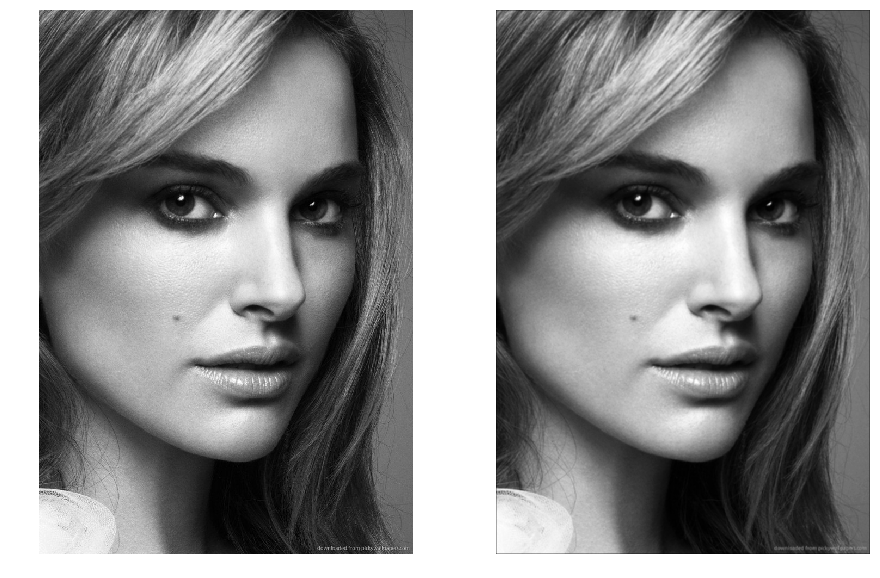

In [25]:
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(proc(im, kernel_blur))
plt.show()


#### *Подчеркивание контуров*

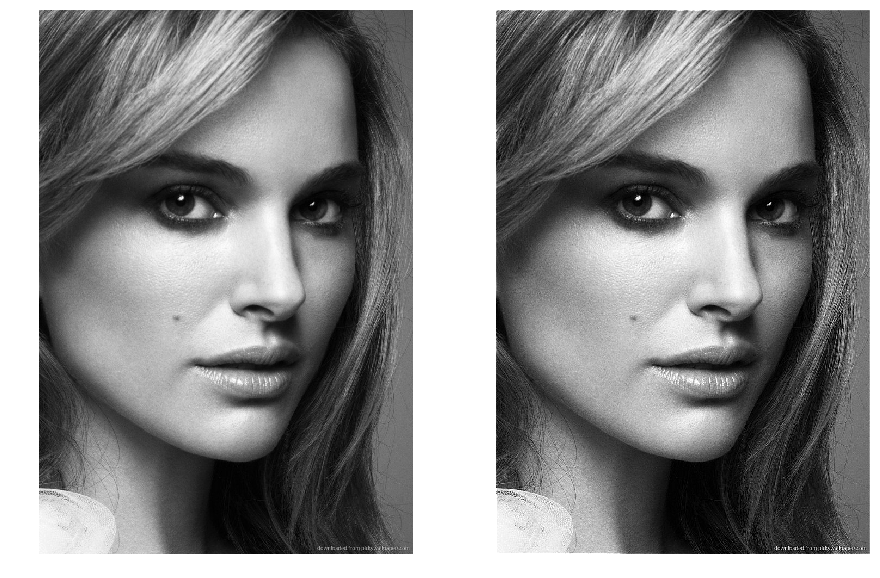

In [26]:
im_out=proc(im, kernel_sharpen1)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

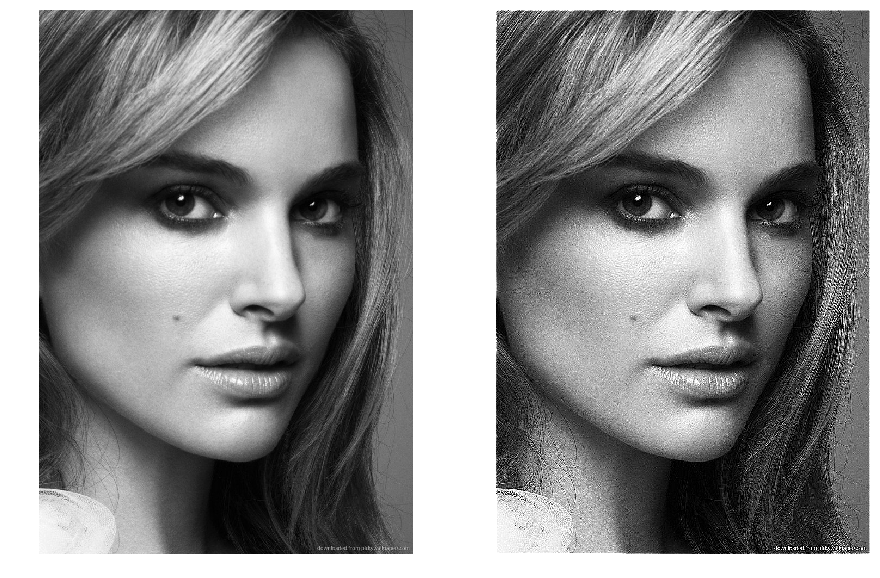

In [27]:
im_out=proc(im, kernel_sharpen2)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

#### *Выделение контуров*

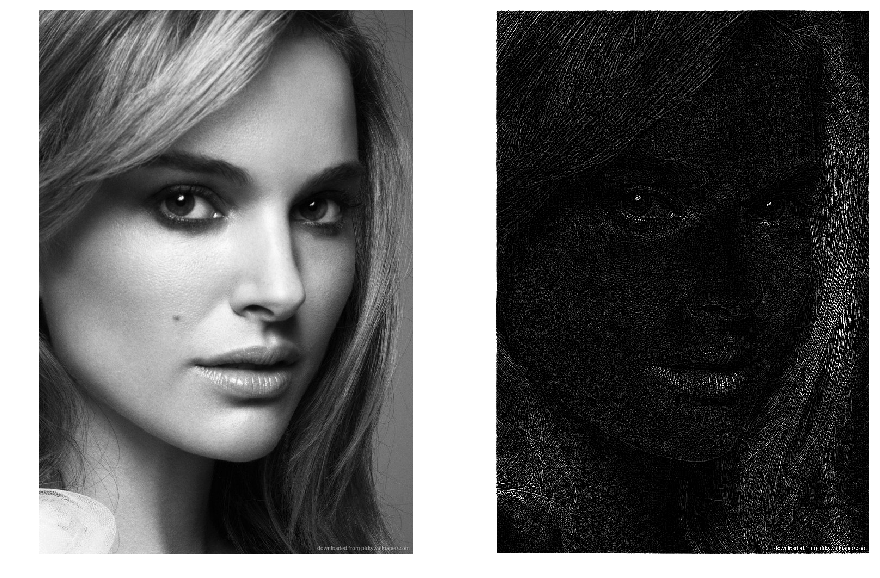

In [28]:
im_out=proc(im, kernel_edge_detect1)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

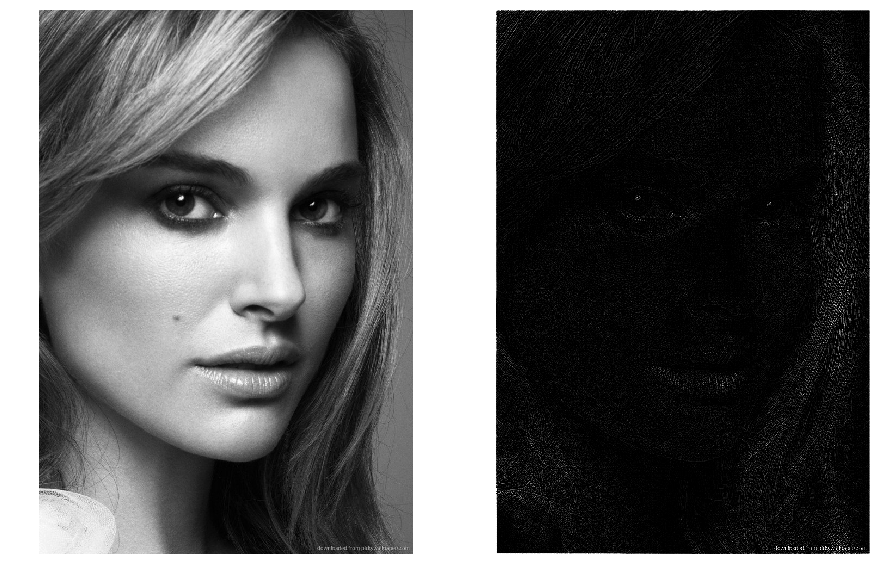

In [29]:
im_out=proc(im, kernel_edge_detect2)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

### Реализовать медианный фильтр 
который используется для подавления точечных и импульсных помех. Пиксел изображения и его соседи в рассматриваемой области выстраиваются в вариационный ряд (по возрастанию или убыванию значений пикселов) и отбирается центральное значение этого вариационного ряда как новое значение пиксела. Результатом усредненного фильтрования является то, что любой случайный шум, содержащийся в изображении, будет эффективно устранен. Это происходит потому, что любое случайное резкое изменение в интенсивности пиксела в пределах рассматриваемой области будет сортироваться, т.е. оно будет помещаться либо на вершину, либо на нижнюю часть сортированных значений этой области и не будет учитываться, так как для нового значения элементов всегда отбирается центральное значение.

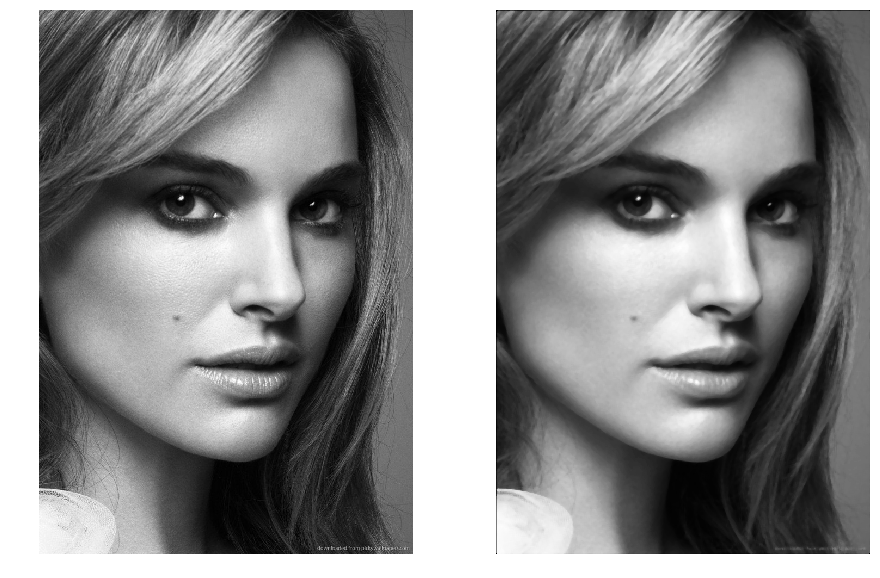

In [30]:
def median(image, size=(5,5)):
    # получение размеров изображения и ядра для итерации по пикселам и весам
    i_height, i_width = image.shape[0], image.shape[1]
    k_width, k_height = size[0], size[1]

    # создание пустого изображения
    filtered = np.zeros_like(image)

    # Итерация по каждому (x, y) пикселу в изображении ...
    for y in range(i_height):
        for x in range(i_width):
            weighted_pixel = []

            # Итерация по каждому значению в ядре, размеры которого определенны выше ...
            for ky in range(-(k_height / 2), k_height - 1):
                for kx in range(-(k_width / 2), k_width - 1):
                    pixel = 0
                    pixel_y = y - ky
                    pixel_x = x - kx

                    # проверка: если пиксель выходит за край изображения, то он равен нулю,
                    # а иначе он берется из изображения
                    if (pixel_y >= 0) and (pixel_y < i_height) and (pixel_x >= 0) and (pixel_x < i_width):
                        pixel = image[pixel_y,pixel_x]

                    # weigh the pixel value and sum
                    weighted_pixel.append(pixel)

            # finally, the pixel at location (x,y) is the sum of the weighed neighborhood
            filtered[y, x] = np.median(weighted_pixel)
    return filtered


plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(median(im))
plt.show()


### Реализовать алгоритм тиснения
Тиснение делается аналогично алгоритмам усреднения или подчеркивания контуров.      Каждый пиксел в изображении обрабатывается ядром (матрицей-маской) тиснения размером 3х3. Например, в качестве ядра тиснения можно взять следующую матрицу-маску:
$$
\begin{bmatrix}
    0  & -1 & 0 \\
    1  &  0 & -1 \\
    0  &  1 & 0
\end{bmatrix}
$$
После того, как значение пиксела обработано ядром тиснения, к нему прибавляется 128. Таким образом значением фоновых пикселов станет средний серый цвет (красный = 128, зеленый = 128, синий = 128). Суммы, превышающие 255, можно округлить до 255. 
В тисненом варианте изображения контуры кажутся выдавленными над поверхностью. Направление подсветки изображения можно изменять, меняя позиции 1 и -1 в ядре. Если, например, поменять местами значения 1 и -1, то реверсируется направление подсветки. 

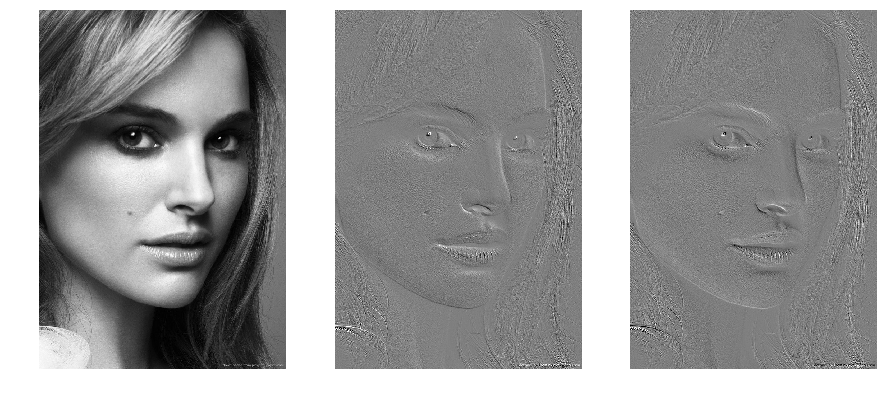

In [31]:
kernel_stamping1= np.array([[0, -1,  0],
                            [1,  0, -1],
                            [0,  1,  0]])

kernel_stamping2= np.array([[0, 1,  0],
                            [-1,  0, 1],
                            [0,  -1,  0]])

im_out1=proc(im, kernel_stamping1, const=127)
im_out2=proc(im, kernel_stamping2, const=127)
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(im_out1)
plt.subplot(1,3,3)
plt.imshow(im_out2)
plt.show()

### Акварелизация изображения. 
Акварельный фильтр преобразует изображение, и после обработки оно выглядит так, как будто написано акварелью: 

* первый шаг в применении акварельного фильтра - сглаживание цветов в изображении. Одним из способов сглаживания является применение  медианнного усреднения цвета в каждой точке. Значение цвета каждого пиксела и его 24 соседей (размер матрицы-маски равен 5х5) выстраиваются в вариационный ряд по убыванию или возрастанию. Медианное (тринадцатое) значение цвета в вариационном ряде присваивается центральному пикселу. 
* после сглаживания цветов необходимо применить фильтр подчеркивания контуров, чтобы выделить границы переходов цветов.

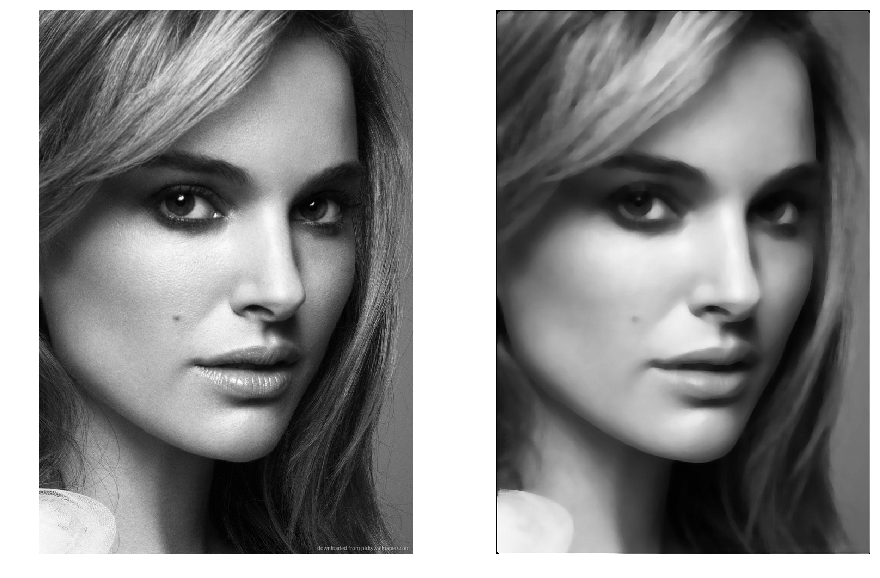

In [32]:
im_out=proc(median(im, size=(10,10)), kernel_sharpen1)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

# Дополнительные эффекты

## Гауссово размытие:

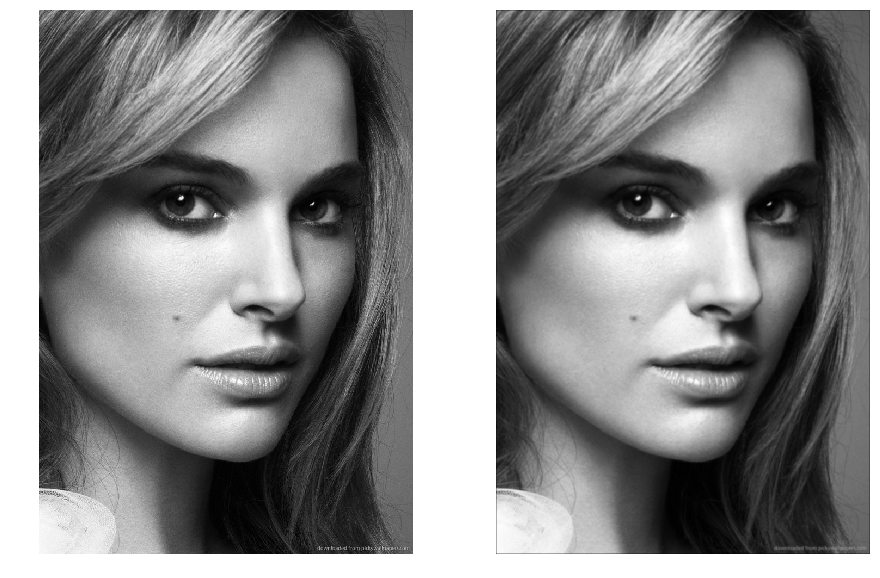

In [33]:
kernel_gaussian = np.array([[1, 4,  6,  4,  1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1, 4,  6,  4,  1]])/256.
im_out=proc(im, kernel_gaussian)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

## Обработка цветных изображений

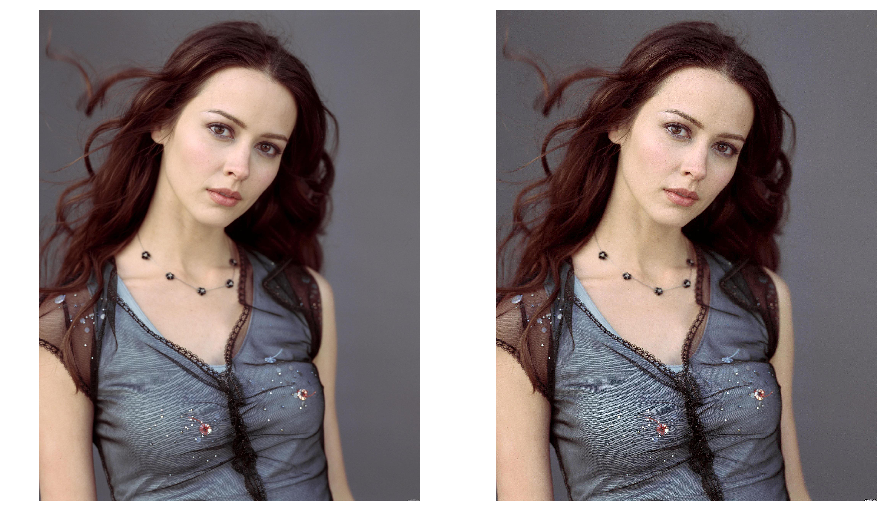

In [34]:
im_clr = imr.imread('files1/test_image1.jpg')
im_out = np.zeros_like(im_clr)
im_out[:,:,0]=proc(im_clr[:,:,0], kernel_sharpen2)
im_out[:,:,1]=proc(im_clr[:,:,1], kernel_sharpen2)
im_out[:,:,2]=proc(im_clr[:,:,2], kernel_sharpen2)
plt.subplot(1,2,1)
plt.imshow(im_clr)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

## Фильтр выделения контуров произвольного размера

[[ -1.  -1.  -1.]
 [ -1.  -1.  -1.]
 [ -1.  -1.  -1.]
 [ -1.  -1.  -1.]
 [ -1.  26.  -1.]
 [ -1.  -1.  -1.]
 [ -1.  -1.  -1.]
 [ -1.  -1.  -1.]
 [ -1.  -1.  -1.]]


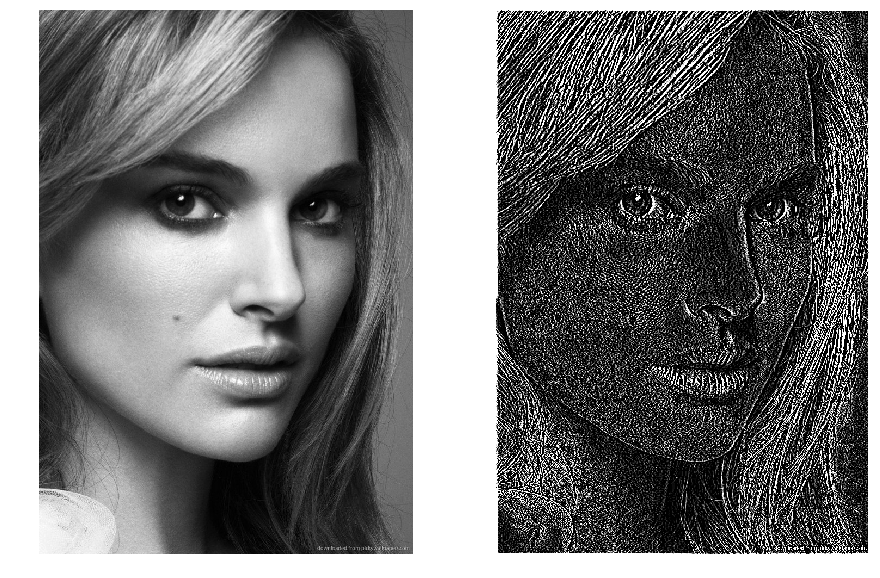

In [35]:
height=3
width=9
size=height*width
k=np.zeros((width, height))
for h in range(height):
    for w in range(width):
        if w == width//2 and h == height//2:
            v=size-1
        else:
            v=-1
        k[w,h]=v
print(k)
im_out=proc(im, k)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

## Фильтр подчеркивания контуров произвольного размера

[[ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  27.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]


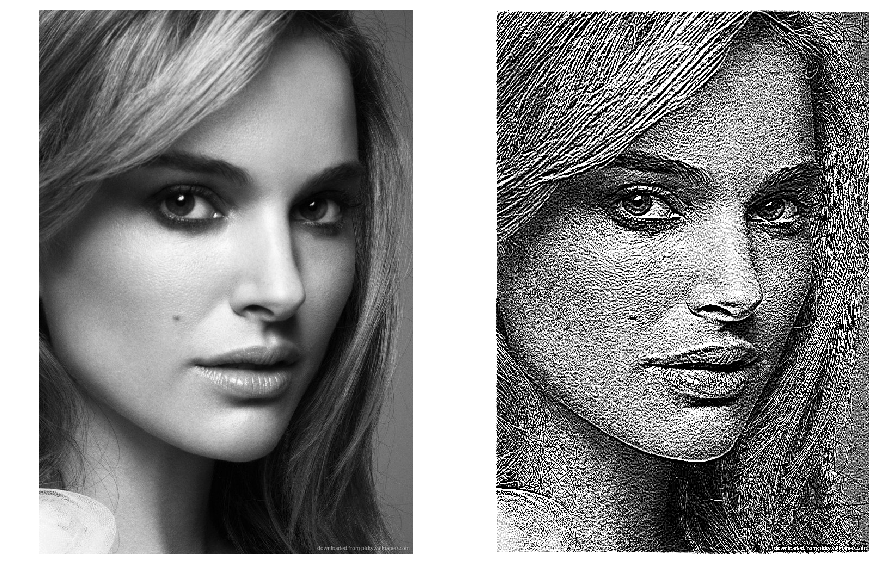

In [36]:
height=9
width=3
size=height*width
k=np.zeros((width, height))
for h in range(height):
    for w in range(width):
        if w == width//2 and h == height//2:
            v=size
        else:
            v=-1
        k[w,h]=v
print(k)
im_out=proc(im, k)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

## *Задания для самостоятельной работы:*

1. Реализуйте фильтр тиснения произвольного размера.
2. Реализуйте фильтр с чётными размерами
3. Какой вид должна иметь матрица (ядро) свертки, чтобы не изменять изображение. Приведите наглядный пример.